<a href="https://colab.research.google.com/github/susanavillar/VISUALIZACION-DE-DATOS/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Sube el archivo CSV desde tu computadora
uploaded = files.upload()

Saving datos_ejercicio_ventas.csv to datos_ejercicio_ventas.csv


In [2]:
import pandas as pd

df = pd.read_csv('datos_ejercicio_ventas.csv')

# Para verificar que se ha cargado correctamente
print(df.head())  # Muestra las primeras filas del archivo


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


Ahora vamos a ver el numero de actuals y de forecasts en SCENARIO

In [9]:
conteo_scenario = df['SCENARIO'].value_counts()
print(conteo_scenario)


SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


**Horizonte de precisión**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Definir el país y la bebida específicos
pais_especifico = "Portugal"
bebida_especifica = "Lipton (L3)"

# Filtrar el DataFrame para el país y bebida específicos
conteo_forecast = df[(df['COUNTRY'] == pais_especifico) &
                      (df['SUBBRAND'] == bebida_especifica) &
                      (df['FORECAST'] == 'AI_P02F')];

# Mostrar el resultado
print(f"El número de meses que he predicho para {pais_especifico} y {bebida_especifica} es: \n\n{conteo_forecast}")

El número de meses que he predicho para Portugal y Lipton (L3) es: 

        COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0      Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F   
742    Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P02F   
953    Portugal  Lipton (L3)  2024      5  AI_forecast  AI_P02F   
2311   Portugal  Lipton (L3)  2023      5  AI_forecast  AI_P02F   
3353   Portugal  Lipton (L3)  2024      7  AI_forecast  AI_P02F   
4945   Portugal  Lipton (L3)  2023      2  AI_forecast  AI_P02F   
5667   Portugal  Lipton (L3)  2023      8  AI_forecast  AI_P02F   
6813   Portugal  Lipton (L3)  2023      3  AI_forecast  AI_P02F   
7152   Portugal  Lipton (L3)  2023     10  AI_forecast  AI_P02F   
9619   Portugal  Lipton (L3)  2024      2  AI_forecast  AI_P02F   
9620   Portugal  Lipton (L3)  2024      4  AI_forecast  AI_P02F   
12899  Portugal  Lipton (L3)  2023      4  AI_forecast  AI_P02F   
13033  Portugal  Lipton (L3)  2024      1  AI_forecast  AI_P

Ahora empezamos con las gráficas


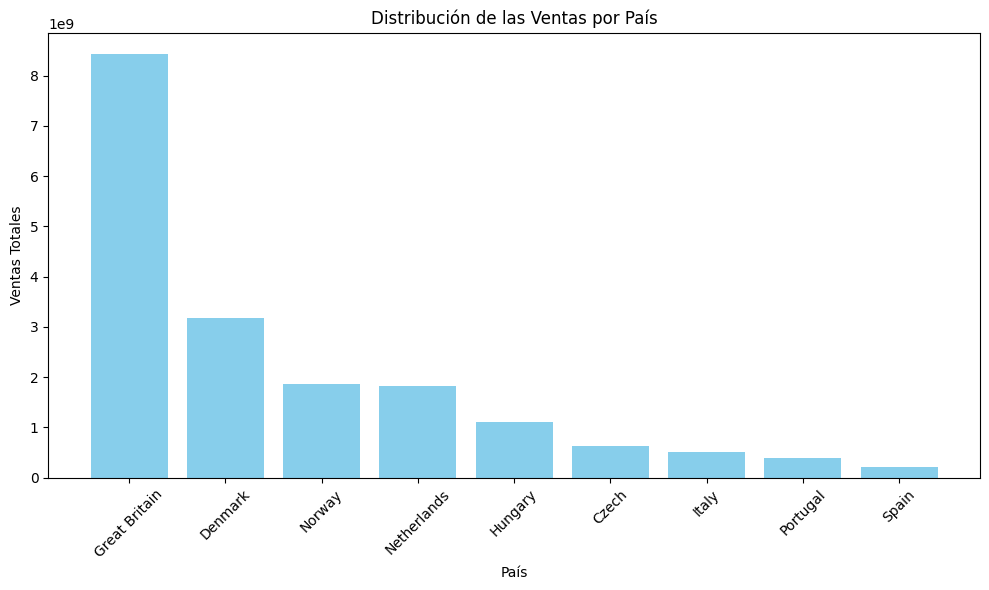

In [4]:
ventas_por_pais = df.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Ordenar de mayor a menor para mejor visualización
ventas_por_pais = ventas_por_pais.sort_values(by='AMOUNT', ascending=False)

# Visualización de la distribución de ventas por país
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_pais['COUNTRY'], ventas_por_pais['AMOUNT'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Ventas Totales')
plt.title('Distribución de las Ventas por País')
plt.xticks(rotation=45)  # Rotar los nombres de los países si son muchos
plt.tight_layout()
plt.show()


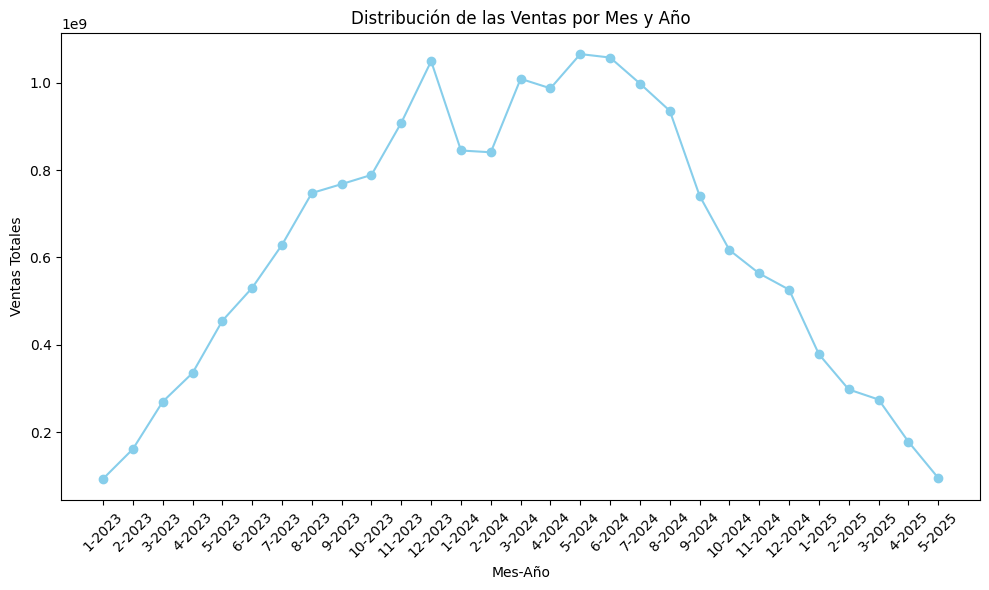

In [5]:
ventas_por_mes_año = df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Ordenar por año y mes para un gráfico correcto
ventas_por_mes_año = ventas_por_mes_año.sort_values(by=['YEAR', 'MONTH'])

# Visualización de las ventas por mes y año con un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_mes_año['MONTH'].astype(str) + '-' + ventas_por_mes_año['YEAR'].astype(str),
         ventas_por_mes_año['AMOUNT'], marker='o', color='skyblue')
plt.xlabel('Mes-Año')
plt.ylabel('Ventas Totales')
plt.title('Distribución de las Ventas por Mes y Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

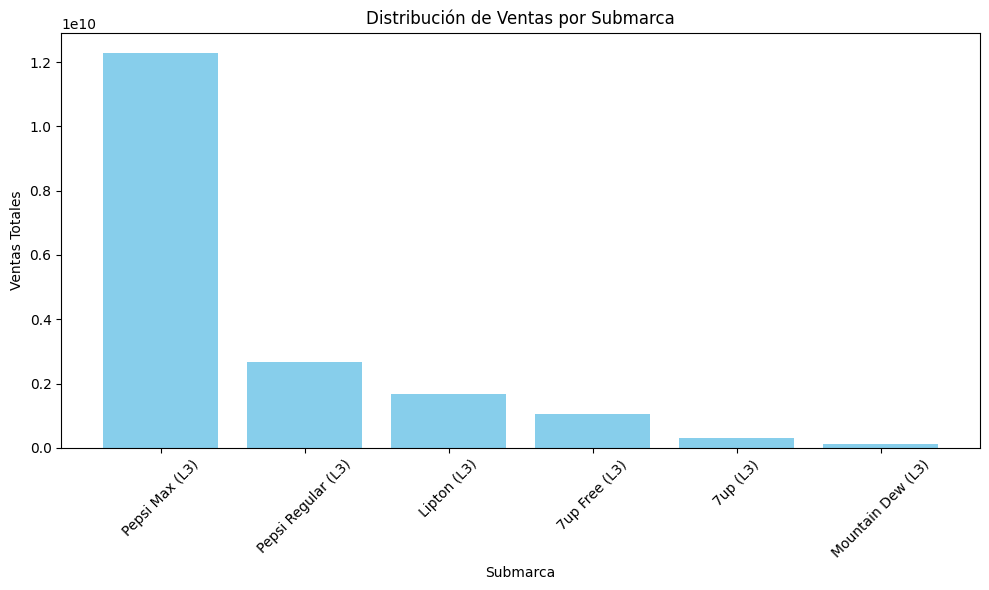

In [6]:
ventas_por_submarca = df.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
ventas_por_submarca = ventas_por_submarca.sort_values(by='AMOUNT', ascending=False)

# Visualización de la distribución de ventas por submarca
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_submarca['SUBBRAND'], ventas_por_submarca['AMOUNT'], color='skyblue')
plt.xlabel('Submarca')
plt.ylabel('Ventas Totales')
plt.title('Distribución de Ventas por Submarca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cual es la tendencia y estacionalidad de:

*   todas las ventas del país con menos ventas
*   la marca con más ventas




1. Numero de Actuals y forecasts ✅
2. Horizonde de precisión: ✅
3. Nº de paises, productos, ... ✅
4. Histórico de datos de actuals/forecast
5. Forecast distintos